<a href="https://colab.research.google.com/github/PaschalisLagias/SportsRating/blob/main/Wk7_Sports_Rating_and_Ranking_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DSTA-8-b: LAB

## Rating and Ranking with Massey, Keener and Markov Methods:

### The Premier League case

We will analyse Premier League results for these three interesting seasons:

1.   2017 - 2018
2.   2018 - 2019
3.   2019 - 2020


Results have been downloaded from [this webpage](https://www.footballwebpages.co.uk/premier-league/match-grid/2021-2022)

## Premier League Champions:

*   **2017 - 2018**: Manchester City (19 points gap from the second team, Manchester United)
*   **2018 - 2019**: Manchester City (1 point gap from Liverpool that finished second)
*   **2019 - 2020**: Liverpool (18 points gap from Manchester City that finished second)



## Import Python packages

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

## Set pandas and numpy options for printing results

In [ ]:
np.set_printoptions(linewidth=1000)

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.colheader_justify', 'center')

## File names

In [ ]:
# League table files
premier_league_table_2017_2018 = "2017_2018_LeagueTable.csv"
premier_league_table_2018_2019 = "2018_2019_LeagueTable.csv"
premier_league_table_2019_2020 = "2019_2020_LeagueTable.csv"

# Match grid files
premier_league_match_grid_2017_2018 = "2017_2018_MatchGrid.csv"
premier_league_match_grid_2018_2019 = "2018_2019_MatchGrid.csv"
premier_league_match_grid_2019_2020 = "2019_2020_MatchGrid.csv"

## Set current working data files and next season files

Hint: Change these variables in case you would like to rate / rank teams based on a different season and check the estimates against the actual rankings of the following season.

In [ ]:
# Current (working) season
current_league_table_file = premier_league_table_2017_2018
current_match_grid_file = premier_league_match_grid_2017_2018
current_season = "2017 - 2018"

# Next season
coming_league_table_file = premier_league_table_2018_2019
coming_match_grid_file = premier_league_match_grid_2018_2019
coming_season = "2018 - 2019"

# 1. Massey from Premiership league table





## Import the league table of the "current" season

In [ ]:
# Read the league table data - skip the first row
league_table = pd.read_csv(current_league_table_file, skiprows=1)
league_table["Actual_Ranking"] = np.arange(1, 21)

league_table

,Unnamed: 0,Unnamed: 1,P,W,D,L,P.1,W.1,D.1,L.1,P.2,W.2,D.2,L.2,F,A,+/-,Pts,Actual_Ranking
0,C,Manchester City,19,16,2,1,19,16,2,1,38,32,4,2,106,27,79,100,1
1,2,Manchester United,19,15,2,2,19,10,4,5,38,25,6,7,68,28,40,81,2
2,3,Tottenham Hotspur,19,13,4,2,19,10,4,5,38,23,8,7,74,36,38,77,3
3,4,Liverpool,19,12,7,0,19,9,5,5,38,21,12,5,84,38,46,75,4
4,5,Chelsea,19,11,4,4,19,10,3,6,38,21,7,10,62,38,24,70,5
5,6,Arsenal,19,15,2,2,19,4,4,11,38,19,6,13,74,51,23,63,6
6,7,Burnley,19,7,5,7,19,7,7,5,38,14,12,12,36,39,-3,54,7
7,8,Everton,19,10,4,5,19,3,6,10,38,13,10,15,44,58,-14,49,8
8,9,Leicester City,19,7,6,6,19,5,5,9,38,12,11,15,56,60,-4,47,9
9,10,Newcastle United,19,8,4,7,19,4,4,11,38,12,8,18,39,47,-8,44,10


## Keep columns about goals scored and rename for clarity

In [ ]:
required_cols = ["Unnamed: 1", "P.2", "F", "A", "+/-", "Pts", "Actual_Ranking"]
renaming = {
    "Unnamed: 1": "Teams",
    "P.2": "Total_Matches_Played",
    "F": "Goals_Scored",
    "A": "Goals_Conceded",
    "+/-": "Goal_Difference",
    "Pts": "Points"
    }

# Make a copy of the league table and keep only the required columns renamed
league_table = (
    league_table
    .loc[:, required_cols]
    .copy()
    .rename(columns=renaming)
)

league_table

,Teams,Total_Matches_Played,Goals_Scored,Goals_Conceded,Goal_Difference,Points,Actual_Ranking
0,Manchester City,38,106,27,79,100,1
1,Manchester United,38,68,28,40,81,2
2,Tottenham Hotspur,38,74,36,38,77,3
3,Liverpool,38,84,38,46,75,4
4,Chelsea,38,62,38,24,70,5
5,Arsenal,38,74,51,23,63,6
6,Burnley,38,36,39,-3,54,7
7,Everton,38,44,58,-14,49,8
8,Leicester City,38,56,60,-4,47,9
9,Newcastle United,38,39,47,-8,44,10


## Create M and p matrices of Massey's method

Below a refresher of the relevant formulas



$$
\mathbf{M} \mathbf{r} = \mathbf{\mathbf{p}}
$$
<br>
<br>

$$\text{Massey Matrix - last row elements set to 1:}$$
<br>
$$
\mathbf{M}_{n \times n} = \begin{pmatrix}
  38 & -2 & -2 & \dots & -2\\
  -2 & 38 & -2 & \dots & -2\\
  -2 & -2 & 38 & \dots & -2\\
  \vdots & \vdots & \vdots & \ddots & -2\\
  1 & 1 & 1 & \dots & 1\\
  \end{pmatrix}$$
<br>
<br>

$$\text{Goal Difference Column Vector:}$$
<br>
$$\mathbf{\mathbf{p}}_{n \times 1} = \begin{pmatrix}
p_1\\
p_2\\
p_3\\
\vdots \\
p_n
\end{pmatrix}$$
<br>

$$\text{Looking for the Ratings Vector:}$$
<br>
$$\\\mathbf{r}_{n \times 1} = \begin{pmatrix}
r_1\\
r_2\\
r_3\\
\vdots \\
r_n
\end{pmatrix}$$
<br>

$$\text{Solution: }  \mathbf{r} = \mathbf{M}^{-1} \mathbf{p}$$

In [ ]:
# Useful constants
N_TEAMS = len(league_table)
MATCHES_PLAYED_PER_TEAM = 2 * (N_TEAMS - 1)

# Create M matrix: non-diagonal elements are the negated number of matches
# played between each pair of teams. Diagonal elements are the total matches
# played per team (both home and away).
M = -2 * np.ones((N_TEAMS, N_TEAMS))
diagonal = np.ones((1, N_TEAMS)) * MATCHES_PLAYED_PER_TEAM
last_row = np.ones((1, N_TEAMS))
np.fill_diagonal(M, diagonal)
M[-1:] = last_row

# Create p column vector with goal difference. Shape: (N_TEAMS, 1)
p = league_table["Goal_Difference"].to_numpy().reshape((-1, 1))

## Solve the system and calculate Massey rankings and ratings - use MinMaxScaler for easier plotting of ratings further below

[Link](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) for sklearn MinMaxScaler documentation

In [ ]:
# Solve the equation system to calculate ratings and add them to the data
r = np.linalg.inv(M).dot(p)
league_table["Massey_Rating"] = r

# Scale the ratings between 100 (top team) and 0 (weakest team).
# MinMaxScaler accepts a tuple (min, max) as input argument to define the range.
min_max_scaler = MinMaxScaler((0, 100))
league_table["Massey_Scaled_Rating"] = min_max_scaler.fit_transform(
    league_table.loc[:, "Massey_Rating"].to_numpy().reshape(-1, 1)
)

# Sort the data by calculated ratings and get Massey ranking
league_table = league_table.sort_values("Massey_Rating", ascending=False)
league_table["Massey_Ranking"] = np.arange(1, 21)

## Keep a data copy to compile ratings and rankings from all methods

In [ ]:
compiled_results = (
    league_table
    .sort_values("Actual_Ranking", ascending=True)
    .copy()
    )

In [ ]:
# Run this if you would like to check the "compiled_results"
compiled_results

,Teams,Total_Matches_Played,Goals_Scored,Goals_Conceded,Goal_Difference,Points,Actual_Ranking,Massey_Rating,Massey_Scaled_Rating,Massey_Ranking
0,Manchester City,38,106,27,79,100,1,0.725,100.000000,1
1,Manchester United,38,68,28,40,81,2,-0.250,65.178571,3
2,Tottenham Hotspur,38,74,36,38,77,3,-0.300,63.392857,4
3,Liverpool,38,84,38,46,75,4,-0.100,70.535714,2
4,Chelsea,38,62,38,24,70,5,-0.650,50.892857,5
5,Arsenal,38,74,51,23,63,6,-0.675,50.000000,6
6,Burnley,38,36,39,-3,54,7,-1.325,26.785714,7
7,Everton,38,44,58,-14,49,8,-1.600,16.964286,11
8,Leicester City,38,56,60,-4,47,9,-1.350,25.892857,8
9,Newcastle United,38,39,47,-8,44,10,-1.450,22.321429,9


## Plot Massey scaled rating and ranking side by side with actual ranking and points scored

Documentation for [matplotlib.pyplot horizontal bar plots](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.barh.html)

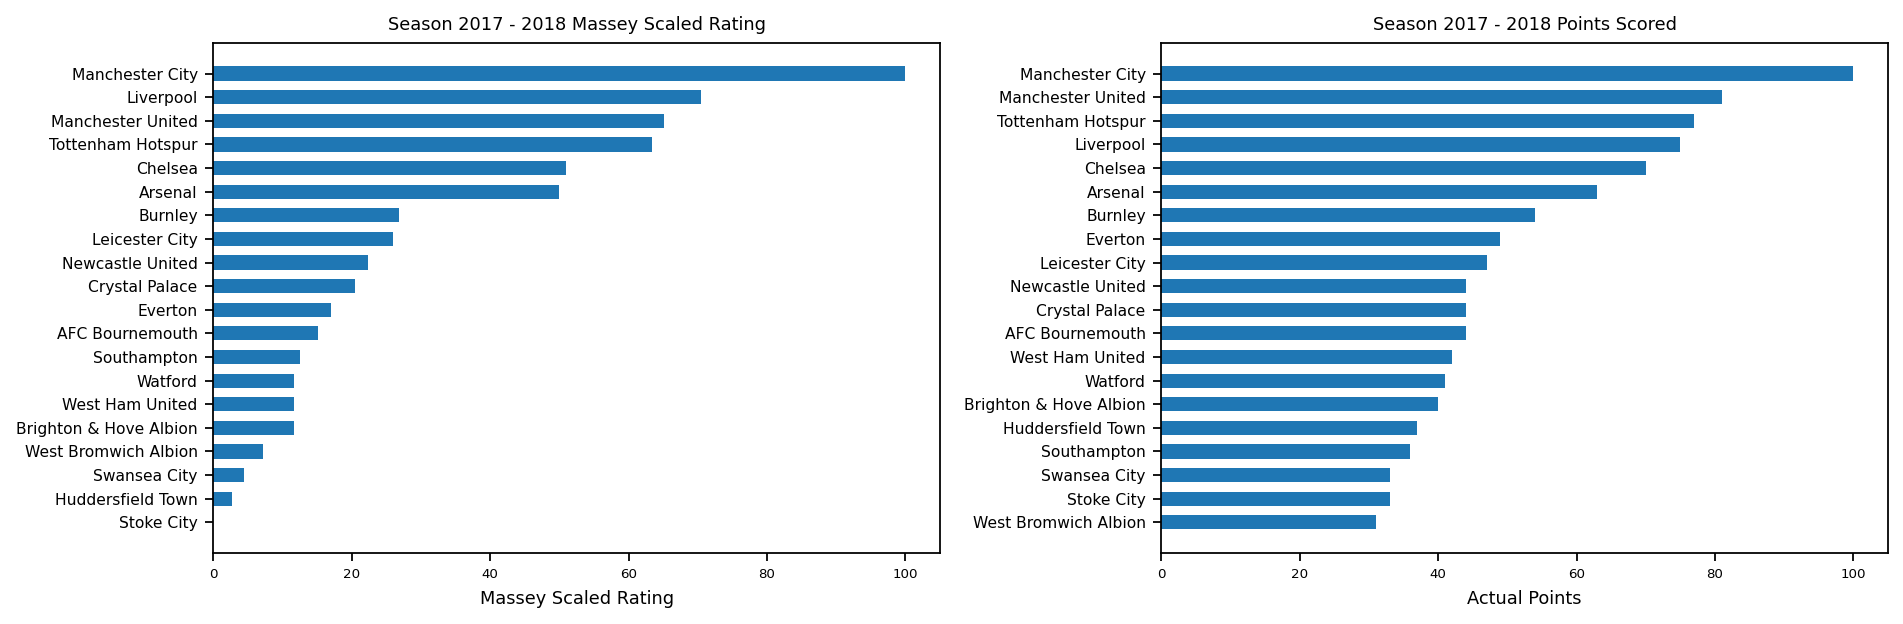

In [ ]:
# Initialize grid of plots
figure, axis = plt.subplots(nrows=1, ncols=2, figsize=(12, 4), dpi=160)

# Plot Massey scaled rating - plot 0, row 0
axis[0].barh(
    league_table["Massey_Ranking"],
    league_table["Massey_Scaled_Rating"],
    height=0.6, align='center'
    )

# Configure y axis
axis[0].set_yticks(
    league_table["Massey_Ranking"],
    labels=league_table["Teams"],
    fontsize=7
    )

axis[0].invert_yaxis()  # labels read top-to-bottom

# X axis and title
axis[0].tick_params(axis="x", labelsize=6)
axis[0].set_xlabel('Massey Scaled Rating', fontsize=8)
axis[0].set_title(f'Season {current_season} Massey Scaled Rating', fontsize=8)

# Plot actual ranking and points scored - plot 1, row 0
axis[1].barh(
    league_table["Actual_Ranking"],
    league_table["Points"],
    height=0.6, align='center'
    )

# Configure y axis
axis[1].set_yticks(
    league_table["Actual_Ranking"],
    labels=league_table["Teams"],
    fontsize=7
    )
axis[1].invert_yaxis()  # labels read top-to-bottom

# X axis and title
axis[1].tick_params(axis="x", labelsize=6)
axis[1].set_xlabel('Actual Points', fontsize=8)
axis[1].set_title(f'Season {current_season} Points Scored', fontsize=8)

# Use 'tight_layout' to avoid overlapping text
plt.tight_layout()
plt.show()

# 2. Keener

## For Keener we need the match grid

In [ ]:
# Each match entry is in the format ="GH-GA" (except from NaN in diagonal).
# GH: goals scored by the home team | GA: goals scored by the away team
# Below, we read the match grid CSV and remove '=' and '"'
match_grid = (
    pd.read_csv(current_match_grid_file, dtype=str, index_col=0)
    .replace('"' , '', regex=True)
    .replace('=' , '', regex=True)
    .fillna("0-0")
    )

# Save all teams as a list
teams = match_grid.columns.to_list()
match_grid

,AFC Bournemouth,Arsenal,Brighton & Hove Albion,Burnley,Chelsea,Crystal Palace,Everton,Huddersfield Town,Leicester City,Liverpool,Manchester City,Manchester United,Newcastle United,Southampton,Stoke City,Swansea City,Tottenham Hotspur,Watford,West Bromwich Albion,West Ham United
AFC Bournemouth,0-0,2-1,2-1,1-2,0-1,2-2,2-1,4-0,0-0,0-4,1-2,0-2,2-2,1-1,2-1,1-0,1-4,0-2,2-1,3-3
Arsenal,3-0,0-0,2-0,5-0,2-2,4-1,5-1,5-0,4-3,3-3,0-3,1-3,1-0,3-2,3-0,2-1,2-0,3-0,2-0,4-1
Brighton & Hove Albion,2-2,2-1,0-0,0-0,0-4,0-0,1-1,1-1,0-2,1-5,0-2,1-0,1-0,1-1,2-2,4-1,1-1,1-0,3-1,3-1
Burnley,1-2,0-1,0-0,0-0,1-2,1-0,2-1,0-0,2-1,1-2,1-1,0-1,1-0,1-1,1-0,2-0,0-3,1-0,0-1,1-1
Chelsea,0-3,0-0,2-0,2-3,0-0,2-1,2-0,1-1,0-0,1-0,0-1,1-0,3-1,1-0,5-0,1-0,1-3,4-2,3-0,1-1
Crystal Palace,2-2,2-3,3-2,1-0,2-1,0-0,2-2,0-3,5-0,1-2,0-0,2-3,1-1,0-1,2-1,0-2,0-1,2-1,2-0,2-2
Everton,2-1,2-5,2-0,0-1,0-0,3-1,0-0,2-0,2-1,0-0,1-3,0-2,1-0,1-1,1-0,3-1,0-3,3-2,1-1,4-0
Huddersfield Town,4-1,0-1,2-0,0-0,1-3,0-2,0-2,0-0,1-1,0-3,1-2,2-1,1-0,0-0,1-1,0-0,0-4,1-0,1-0,1-4
Leicester City,1-1,3-1,2-0,1-0,1-2,0-3,2-0,3-0,0-0,2-3,0-2,2-2,1-2,0-0,1-1,1-1,2-1,2-0,1-1,0-2
Liverpool,3-0,4-0,4-0,1-1,1-1,1-0,1-1,3-0,2-1,0-0,4-3,0-0,2-0,3-0,0-0,5-0,2-2,5-0,0-0,4-1


## Create Keener S matrix

Below a refresher

$$S_{n \times n} \text{ where } S_{ij} \text{: Total goals scored from team } i \text{ against team } j$$
<br>
$$n \text{ represents the number of teams in the league}$$

## Exercise 2: Complete the code to calculate Keener's S matrix

## Steps required

1.   Parse scores. Example: "3-2". The home team scored 3 goals and the away team 2. Hint: Pandas [applymap documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.applymap.html)
2.   Match every team's home match with the respective away match against the same opponent. Hint: The home match of team *i* against *j* is element *ij*. The respective away match is element *ji* - row and column indexes are swapped...

In [ ]:
# Parse score and get goals of a home match
home_goals_ij = lambda score: int(score.split("-")[0])
all_home_goals_ij = match_grid.applymap(home_goals_ij)

# Parse score and get goals of an away match
# The grid is transposed to match every team's respective
# home and away matches
away_goals_ij = lambda score: int(score.split("-")[1])
all_away_goals_ij = match_grid.T.applymap(away_goals_ij)

# Sum goals scored
S_dataframe = all_home_goals_ij + all_away_goals_ij

In [ ]:
S_dataframe

,AFC Bournemouth,Arsenal,Brighton & Hove Albion,Burnley,Chelsea,Crystal Palace,Everton,Huddersfield Town,Leicester City,Liverpool,Manchester City,Manchester United,Newcastle United,Southampton,Stoke City,Swansea City,Tottenham Hotspur,Watford,West Bromwich Albion,West Ham United
AFC Bournemouth,0,2,4,3,3,4,3,5,1,0,1,0,3,2,4,1,1,2,2,4
Arsenal,4,0,3,6,2,7,10,6,5,3,1,2,2,4,3,3,2,4,3,4
Brighton & Hove Albion,3,2,0,0,0,2,1,1,0,1,1,1,1,2,3,5,1,1,3,6
Burnley,3,0,0,0,4,1,3,0,2,2,1,2,2,2,2,2,1,3,2,4
Chelsea,1,2,6,4,0,3,2,4,2,2,0,2,3,4,9,2,3,5,7,1
Crystal Palace,4,3,3,1,3,0,3,2,8,1,0,2,1,2,4,1,0,2,2,3
Everton,3,3,3,1,0,5,0,4,2,1,2,0,2,2,3,4,0,3,1,5
Huddersfield Town,4,0,3,0,2,3,0,0,1,0,1,2,1,1,1,0,0,5,3,1
Leicester City,1,6,4,2,1,0,3,4,0,3,1,2,4,4,3,3,6,3,5,1
Liverpool,7,7,9,3,1,3,1,6,5,0,4,1,3,5,3,5,3,8,2,8


## Create Keener A matrix

Below a refresher

$$\mathbf{A}_{n \times n} = \left[\frac{S_{ij}+ 1}{S_{ij} + S_{ji} + 2}\right]_{n \times n}$$
<br>
$$\mathbf{A}_{n \times n} = [a_{ij}] = \left[h\left(\frac{S_{ij}+ 1}{S_{ij} + S_{ji} + 2}\right)\right]_{n \times n}$$
<br>
$$\text{where } h(x) = \frac{1}{2} + \frac{sgn\{x - (1/2)\}\sqrt{|2x - 1|}}{2}$$

## Exercise 3: Complete the code (check 'TODO' comments) to get matrix A

## Calculate the Numerator

In [ ]:
A_numerator = S_dataframe.copy().to_numpy() + 1
A_numerator

array([[ 1,  3,  5,  4,  4,  5,  4,  6,  2,  1,  2,  1,  4,  3,  5,  2,  2,  3,  3,  5],
       [ 5,  1,  4,  7,  3,  8, 11,  7,  6,  4,  2,  3,  3,  5,  4,  4,  3,  5,  4,  5],
       [ 4,  3,  1,  1,  1,  3,  2,  2,  1,  2,  2,  2,  2,  3,  4,  6,  2,  2,  4,  7],
       [ 4,  1,  1,  1,  5,  2,  4,  1,  3,  3,  2,  3,  3,  3,  3,  3,  2,  4,  3,  5],
       [ 2,  3,  7,  5,  1,  4,  3,  5,  3,  3,  1,  3,  4,  5, 10,  3,  4,  6,  8,  2],
       [ 5,  4,  4,  2,  4,  1,  4,  3,  9,  2,  1,  3,  2,  3,  5,  2,  1,  3,  3,  4],
       [ 4,  4,  4,  2,  1,  6,  1,  5,  3,  2,  3,  1,  3,  3,  4,  5,  1,  4,  2,  6],
       [ 5,  1,  4,  1,  3,  4,  1,  1,  2,  1,  2,  3,  2,  2,  2,  1,  1,  6,  4,  2],
       [ 2,  7,  5,  3,  2,  1,  4,  5,  1,  4,  2,  3,  5,  5,  4,  4,  7,  4,  6,  2],
       [ 8,  8, 10,  4,  2,  4,  2,  7,  6,  1,  5,  2,  4,  6,  4,  6,  4,  9,  3,  9],
       [ 7,  7,  6,  5,  3,  6,  5,  3,  8,  9,  1,  5,  5,  4, 10, 10,  8, 10,  7,  7],
       [ 4,  6,  2,  

## Calculate the Denominator

In [ ]:
A_denominator = S_dataframe.copy().to_numpy()
A_denominator += A_denominator.T
A_denominator += 2

## Calculate A

In [ ]:
A = np.divide(A_numerator, A_denominator)

## Apply skewing to A

Numpy [vectorize documentation](https://numpy.org/doc/stable/reference/generated/numpy.vectorize.html) and [Generalized Universal Function API](https://numpy.org/doc/stable/reference/c-api/generalized-ufuncs.html)

In [ ]:
def skewing_function(x: float) -> float:
    """
    Desc : Function proposed by Keener to skew the data of
    matrix A calculated above.

    :parameter x: A single entry of matrix A.

    :return: The transformed entry passed through the skewing function
    """
    numerator = np.sign(x - 0.5) * np.sqrt(np.abs(2 * x - 1))
    return 0.5 + numerator / 2

# Vectorize the skewing function for appying it to a numpy array
ufunc_skewing_function = np.vectorize(skewing_function)
A = ufunc_skewing_function(A)

# Uncomment if you want to inspect the final A matrix
# A

## Calculate Eigenvalues and Eigenvectors

Numpy [documentation on eigenvalues and eigenvectors](https://numpy.org/doc/stable/reference/generated/numpy.linalg.eig.html)

$$\mathbf{A} \mathbf{r} = λ \mathbf{r}, \mathbf{r} > 0 \text{ and } \sum_{j=1}^{n}r_j = 1$$
<br>
$$λ \text{: Perron value (dominant eigenvalue)}$$
$$\mathbf{r} \text{: Perron vector (dominant eigenvector)}$$
<br>
<br>
$$\text{Looking for the Ratings Vector:}$$
<br>
$$\\\mathbf{r}_{n \times 1} = \begin{pmatrix}
r_1\\
r_2\\
r_3\\
\vdots \\
r_n
\end{pmatrix}$$

## Exercise 4: Compute eigenvalues and eigenvectors of A and pick the largest eigenvalue

In [ ]:
eigenvals, eigenvecs = np.linalg.eig(A)
max_eigenvalue_index = np.argmax(eigenvals)

## The imaginary part of the dominant eigenvalue must be 0.

In [ ]:
eigenvals[max_eigenvalue_index]

(9.281862889906389+0j)

## Save the Perron value as a float

In [ ]:
perron_value = float(eigenvals[max_eigenvalue_index])
print(f"Perron value: {perron_value}")

Perron value: 9.281862889906389


<ipython-input-101-ce07f9298331>:1: ComplexWarning: Casting complex values to real discards the imaginary part
  perron_value = float(eigenvals[max_eigenvalue_index])


## The imaginary part of all the entries in the dominant eigenvector must be zero

In [ ]:
eigenvecs[: , max_eigenvalue_index].reshape(-1, 1)

array([[-0.19032472+0.j],
       [-0.2633992 +0.j],
       [-0.17547882+0.j],
       [-0.21770192+0.j],
       [-0.25425007+0.j],
       [-0.18739085+0.j],
       [-0.19454027+0.j],
       [-0.15414491+0.j],
       [-0.21954511+0.j],
       [-0.28528845+0.j],
       [-0.36512934+0.j],
       [-0.31255257+0.j],
       [-0.18606267+0.j],
       [-0.16561804+0.j],
       [-0.15352395+0.j],
       [-0.15172886+0.j],
       [-0.30485764+0.j],
       [-0.17231638+0.j],
       [-0.17158679+0.j],
       [-0.18312368+0.j]])

## Save the real part of the dominant eigenvector entries

This is not the Perron vector yet (we could get all entries as negatives). We use the "Brute Force" technique described in Keener chapter of the textbook to convert this vector to Perron vector.

In [ ]:
dominant_eigenvector = eigenvecs[: , 0].reshape(-1, 1).astype(float)
dominant_eigenvector

<ipython-input-103-b33fe18fcda4>:1: ComplexWarning: Casting complex values to real discards the imaginary part
  dominant_eigenvector = eigenvecs[: , 0].reshape(-1, 1).astype(float)


array([[-0.19032472],
       [-0.2633992 ],
       [-0.17547882],
       [-0.21770192],
       [-0.25425007],
       [-0.18739085],
       [-0.19454027],
       [-0.15414491],
       [-0.21954511],
       [-0.28528845],
       [-0.36512934],
       [-0.31255257],
       [-0.18606267],
       [-0.16561804],
       [-0.15352395],
       [-0.15172886],
       [-0.30485764],
       [-0.17231638],
       [-0.17158679],
       [-0.18312368]])

## Calculate the actual Perron vector where all ratings have a sum of 1

In [ ]:
# Divide by sum so that all ratings sum to 1
perron_vector = dominant_eigenvector / np.sum(dominant_eigenvector)

In [ ]:
match_grid["Keener_Rating"] = perron_vector

In [ ]:
match_grid["Keener_Rating"]

AFC Bournemouth           0.044174
Arsenal                   0.061134
Brighton & Hove Albion    0.040728
Burnley                   0.050528
Chelsea                   0.059010
Crystal Palace            0.043493
Everton                   0.045152
Huddersfield Town         0.035776
Leicester City            0.050956
Liverpool                 0.066214
Manchester City           0.084745
Manchester United         0.072542
Newcastle United          0.043184
Southampton               0.038439
Stoke City                0.035632
Swansea City              0.035216
Tottenham Hotspur         0.070756
Watford                   0.039994
West Bromwich Albion      0.039825
West Ham United           0.042502
Name: Keener_Rating, dtype: float64

## Use a MinMaxScaler to scale Keener ratings between 0 and 100 for plotting.

In [ ]:
# Scale the ratings between 100 (top team) and 0 (weakest team).
# MinMaxScaler accepts a tuple (min, max) as input argument to define the range.
min_max_scaler = MinMaxScaler((0, 100))
match_grid["Keener_Scaled_Rating"] = min_max_scaler.fit_transform(
    match_grid.loc[:, "Keener_Rating"].values.reshape(-1, 1)
    )

# Sort by Keener rating - strongest team on top, assign Keener ranking
match_grid = match_grid.sort_values("Keener_Rating", ascending=False)
match_grid["Keener_Ranking"] = np.arange(1, 21)

In [ ]:
match_grid

,AFC Bournemouth,Arsenal,Brighton & Hove Albion,Burnley,Chelsea,Crystal Palace,Everton,Huddersfield Town,Leicester City,Liverpool,Manchester City,Manchester United,Newcastle United,Southampton,Stoke City,Swansea City,Tottenham Hotspur,Watford,West Bromwich Albion,West Ham United,Keener_Rating,Keener_Scaled_Rating,Keener_Ranking
Manchester City,4-0,3-1,3-1,3-0,1-0,5-0,1-1,0-0,5-1,5-0,0-0,2-3,3-1,2-1,7-2,5-0,4-1,3-1,3-0,2-1,0.084745,100.000000,1
Manchester United,1-0,2-1,1-0,2-2,2-1,4-0,4-0,2-0,2-0,2-1,1-2,0-0,4-1,0-0,3-0,2-0,1-0,1-0,0-1,4-0,0.072542,75.362393,2
Tottenham Hotspur,1-0,1-0,2-0,1-1,1-2,1-0,4-0,2-0,5-4,4-1,1-3,2-0,1-0,5-2,5-1,0-0,0-0,2-0,1-1,1-1,0.070756,71.756530,3
Liverpool,3-0,4-0,4-0,1-1,1-1,1-0,1-1,3-0,2-1,0-0,4-3,0-0,2-0,3-0,0-0,5-0,2-2,5-0,0-0,4-1,0.066214,62.586358,4
Arsenal,3-0,0-0,2-0,5-0,2-2,4-1,5-1,5-0,4-3,3-3,0-3,1-3,1-0,3-2,3-0,2-1,2-0,3-0,2-0,4-1,0.061134,52.329002,5
Chelsea,0-3,0-0,2-0,2-3,0-0,2-1,2-0,1-1,0-0,1-0,0-1,1-0,3-1,1-0,5-0,1-0,1-3,4-2,3-0,1-1,0.059010,48.041696,6
Leicester City,1-1,3-1,2-0,1-0,1-2,0-3,2-0,3-0,0-0,2-3,0-2,2-2,1-2,0-0,1-1,1-1,2-1,2-0,1-1,0-2,0.050956,31.778867,7
Burnley,1-2,0-1,0-0,0-0,1-2,1-0,2-1,0-0,2-1,1-2,1-1,0-1,1-0,1-1,1-0,2-0,0-3,1-0,0-1,1-1,0.050528,30.915142,8
Everton,2-1,2-5,2-0,0-1,0-0,3-1,0-0,2-0,2-1,0-0,1-3,0-2,1-0,1-1,1-0,3-1,0-3,3-2,1-1,4-0,0.045152,20.061537,9
AFC Bournemouth,0-0,2-1,2-1,1-2,0-1,2-2,2-1,4-0,0-0,0-4,1-2,0-2,2-2,1-1,2-1,1-0,1-4,0-2,2-1,3-3,0.044174,18.086120,10


## Import the league table to get actual rankings and points scored

As the match grid does not contain the actual points scored per team, we have to import the league table.

In [ ]:
# Read the league table data - skip the first row
league_table = pd.read_csv(current_league_table_file, skiprows=1)
league_table["Actual_Ranking"] = np.arange(1, 21)
league_table

,Unnamed: 0,Unnamed: 1,P,W,D,L,P.1,W.1,D.1,L.1,P.2,W.2,D.2,L.2,F,A,+/-,Pts,Actual_Ranking
0,C,Manchester City,19,16,2,1,19,16,2,1,38,32,4,2,106,27,79,100,1
1,2,Manchester United,19,15,2,2,19,10,4,5,38,25,6,7,68,28,40,81,2
2,3,Tottenham Hotspur,19,13,4,2,19,10,4,5,38,23,8,7,74,36,38,77,3
3,4,Liverpool,19,12,7,0,19,9,5,5,38,21,12,5,84,38,46,75,4
4,5,Chelsea,19,11,4,4,19,10,3,6,38,21,7,10,62,38,24,70,5
5,6,Arsenal,19,15,2,2,19,4,4,11,38,19,6,13,74,51,23,63,6
6,7,Burnley,19,7,5,7,19,7,7,5,38,14,12,12,36,39,-3,54,7
7,8,Everton,19,10,4,5,19,3,6,10,38,13,10,15,44,58,-14,49,8
8,9,Leicester City,19,7,6,6,19,5,5,9,38,12,11,15,56,60,-4,47,9
9,10,Newcastle United,19,8,4,7,19,4,4,11,38,12,8,18,39,47,-8,44,10


## We keep only teams, actual ranking and points.

In [ ]:
required_cols = ["Unnamed: 1", "Pts", "Actual_Ranking"]
renaming = {"Unnamed: 1": "Teams", "Pts": "Points"}

# Make a copy of the league table, keeping only the necessary columns renamed
# Index is reset as the teams for the table join below
league_table = (
    league_table
    .loc[:, required_cols]
    .copy()
    .rename(columns=renaming)
    .set_index("Teams")
)

league_table

,Points,Actual_Ranking
Teams,,
Manchester City,100,1
Manchester United,81,2
Tottenham Hotspur,77,3
Liverpool,75,4
Chelsea,70,5
Arsenal,63,6
Burnley,54,7
Everton,49,8
Leicester City,47,9


## Join the match grid that holds Keener ratings with the league table and the actual ratings based on team names

In [ ]:
match_grid = match_grid.join(league_table)
match_grid

,AFC Bournemouth,Arsenal,Brighton & Hove Albion,Burnley,Chelsea,Crystal Palace,Everton,Huddersfield Town,Leicester City,Liverpool,Manchester City,Manchester United,Newcastle United,Southampton,Stoke City,Swansea City,Tottenham Hotspur,Watford,West Bromwich Albion,West Ham United,Keener_Rating,Keener_Scaled_Rating,Keener_Ranking,Points,Actual_Ranking
Manchester City,4-0,3-1,3-1,3-0,1-0,5-0,1-1,0-0,5-1,5-0,0-0,2-3,3-1,2-1,7-2,5-0,4-1,3-1,3-0,2-1,0.084745,100.000000,1,100,1
Manchester United,1-0,2-1,1-0,2-2,2-1,4-0,4-0,2-0,2-0,2-1,1-2,0-0,4-1,0-0,3-0,2-0,1-0,1-0,0-1,4-0,0.072542,75.362393,2,81,2
Tottenham Hotspur,1-0,1-0,2-0,1-1,1-2,1-0,4-0,2-0,5-4,4-1,1-3,2-0,1-0,5-2,5-1,0-0,0-0,2-0,1-1,1-1,0.070756,71.756530,3,77,3
Liverpool,3-0,4-0,4-0,1-1,1-1,1-0,1-1,3-0,2-1,0-0,4-3,0-0,2-0,3-0,0-0,5-0,2-2,5-0,0-0,4-1,0.066214,62.586358,4,75,4
Arsenal,3-0,0-0,2-0,5-0,2-2,4-1,5-1,5-0,4-3,3-3,0-3,1-3,1-0,3-2,3-0,2-1,2-0,3-0,2-0,4-1,0.061134,52.329002,5,63,6
Chelsea,0-3,0-0,2-0,2-3,0-0,2-1,2-0,1-1,0-0,1-0,0-1,1-0,3-1,1-0,5-0,1-0,1-3,4-2,3-0,1-1,0.059010,48.041696,6,70,5
Leicester City,1-1,3-1,2-0,1-0,1-2,0-3,2-0,3-0,0-0,2-3,0-2,2-2,1-2,0-0,1-1,1-1,2-1,2-0,1-1,0-2,0.050956,31.778867,7,47,9
Burnley,1-2,0-1,0-0,0-0,1-2,1-0,2-1,0-0,2-1,1-2,1-1,0-1,1-0,1-1,1-0,2-0,0-3,1-0,0-1,1-1,0.050528,30.915142,8,54,7
Everton,2-1,2-5,2-0,0-1,0-0,3-1,0-0,2-0,2-1,0-0,1-3,0-2,1-0,1-1,1-0,3-1,0-3,3-2,1-1,4-0,0.045152,20.061537,9,49,8
AFC Bournemouth,0-0,2-1,2-1,1-2,0-1,2-2,2-1,4-0,0-0,0-4,1-2,0-2,2-2,1-1,2-1,1-0,1-4,0-2,2-1,3-3,0.044174,18.086120,10,44,12


## Add Keener to the dataset that holds results from Massey

In [ ]:
cols_to_keep = [
    "Keener_Rating",
    "Keener_Scaled_Rating",
    "Keener_Ranking"
    ]

# Data needed from Keener output - sort by actual ranking first
data_to_keep = (
    match_grid
    .sort_values("Actual_Ranking", ascending=True)
    .loc[:, cols_to_keep]
    .copy()
    .reset_index(drop=False)
    .rename(columns={"index": "Teams"})
    )

compiled_results = (compiled_results.merge(data_to_keep, on="Teams"))
compiled_results

,Teams,Total_Matches_Played,Goals_Scored,Goals_Conceded,Goal_Difference,Points,Actual_Ranking,Massey_Rating,Massey_Scaled_Rating,Massey_Ranking,Keener_Rating,Keener_Scaled_Rating,Keener_Ranking
0,Manchester City,38,106,27,79,100,1,0.725,100.000000,1,0.084745,100.000000,1
1,Manchester United,38,68,28,40,81,2,-0.250,65.178571,3,0.072542,75.362393,2
2,Tottenham Hotspur,38,74,36,38,77,3,-0.300,63.392857,4,0.070756,71.756530,3
3,Liverpool,38,84,38,46,75,4,-0.100,70.535714,2,0.066214,62.586358,4
4,Chelsea,38,62,38,24,70,5,-0.650,50.892857,5,0.059010,48.041696,6
5,Arsenal,38,74,51,23,63,6,-0.675,50.000000,6,0.061134,52.329002,5
6,Burnley,38,36,39,-3,54,7,-1.325,26.785714,7,0.050528,30.915142,8
7,Everton,38,44,58,-14,49,8,-1.600,16.964286,11,0.045152,20.061537,9
8,Leicester City,38,56,60,-4,47,9,-1.350,25.892857,8,0.050956,31.778867,7
9,Newcastle United,38,39,47,-8,44,10,-1.450,22.321429,9,0.043184,16.088910,12


## Plot Keener scaled rating and ranking side by side with actual ranking and points scored

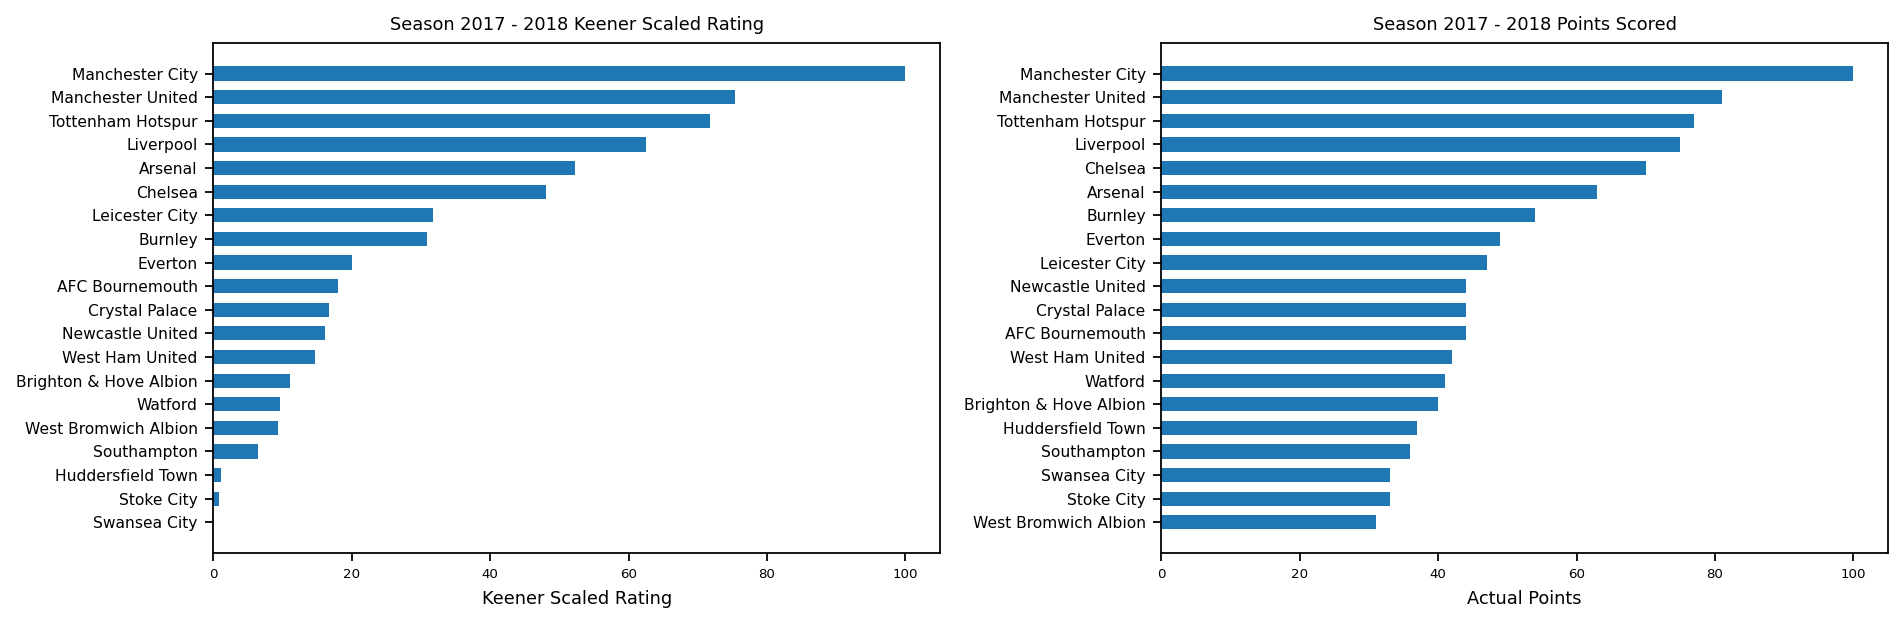

In [ ]:
# Initialize grid of plots
figure, axis = plt.subplots(nrows=1, ncols=2, figsize=(12, 4), dpi=160)

# Plot Keener scaled rating - plot 0, row 0
axis[0].barh(
    match_grid["Keener_Ranking"],
    match_grid["Keener_Scaled_Rating"],
    height=0.6, align='center'
    )

# Configure y axis
axis[0].set_yticks(
    match_grid["Keener_Ranking"],
    labels=match_grid.index,
    fontsize=7
    )
axis[0].invert_yaxis()  # labels read top-to-bottom

# X axis and title
axis[0].tick_params(axis="x", labelsize=6)
axis[0].set_xlabel('Keener Scaled Rating', fontsize=8)
axis[0].set_title(f'Season {current_season} Keener Scaled Rating', fontsize=8)

# Plot actual ranking and point scored - plot 1, row 0
axis[1].barh(
    match_grid["Actual_Ranking"],
    match_grid["Points"],
    height=0.6, align='center'
    )

# Configure y axis
axis[1].set_yticks(
    match_grid["Actual_Ranking"],
    labels=match_grid.index,
    fontsize=7
    )
axis[1].invert_yaxis()  # labels read top-to-bottom

# X axis and title
axis[1].tick_params(axis="x", labelsize=6)
axis[1].set_xlabel('Actual Points', fontsize=8)
axis[1].set_title(f'Season {current_season} Points Scored', fontsize=8)

# Use 'tight_layout' to avoid overlapping text
plt.tight_layout()
plt.show()

# 4. Markov

## For Markov we need again the match grid

In [ ]:
# Each match entry is in the format ="GH-GA" (except from NaN in diagonal).
# GH: goals scored by the home team | GA: goals scored by the away team
# Below, we read the match grid CSV and remove '=' and '"'
match_grid = (
    pd.read_csv(current_match_grid_file, dtype=str, index_col=0)
    .replace('"' , '', regex=True)
    .replace('=' , '', regex=True)
    .fillna("0-0")
    )

# Save all teams as a list
teams = match_grid.columns.to_list()
match_grid

,AFC Bournemouth,Arsenal,Brighton & Hove Albion,Burnley,Chelsea,Crystal Palace,Everton,Huddersfield Town,Leicester City,Liverpool,Manchester City,Manchester United,Newcastle United,Southampton,Stoke City,Swansea City,Tottenham Hotspur,Watford,West Bromwich Albion,West Ham United
AFC Bournemouth,0-0,2-1,2-1,1-2,0-1,2-2,2-1,4-0,0-0,0-4,1-2,0-2,2-2,1-1,2-1,1-0,1-4,0-2,2-1,3-3
Arsenal,3-0,0-0,2-0,5-0,2-2,4-1,5-1,5-0,4-3,3-3,0-3,1-3,1-0,3-2,3-0,2-1,2-0,3-0,2-0,4-1
Brighton & Hove Albion,2-2,2-1,0-0,0-0,0-4,0-0,1-1,1-1,0-2,1-5,0-2,1-0,1-0,1-1,2-2,4-1,1-1,1-0,3-1,3-1
Burnley,1-2,0-1,0-0,0-0,1-2,1-0,2-1,0-0,2-1,1-2,1-1,0-1,1-0,1-1,1-0,2-0,0-3,1-0,0-1,1-1
Chelsea,0-3,0-0,2-0,2-3,0-0,2-1,2-0,1-1,0-0,1-0,0-1,1-0,3-1,1-0,5-0,1-0,1-3,4-2,3-0,1-1
Crystal Palace,2-2,2-3,3-2,1-0,2-1,0-0,2-2,0-3,5-0,1-2,0-0,2-3,1-1,0-1,2-1,0-2,0-1,2-1,2-0,2-2
Everton,2-1,2-5,2-0,0-1,0-0,3-1,0-0,2-0,2-1,0-0,1-3,0-2,1-0,1-1,1-0,3-1,0-3,3-2,1-1,4-0
Huddersfield Town,4-1,0-1,2-0,0-0,1-3,0-2,0-2,0-0,1-1,0-3,1-2,2-1,1-0,0-0,1-1,0-0,0-4,1-0,1-0,1-4
Leicester City,1-1,3-1,2-0,1-0,1-2,0-3,2-0,3-0,0-0,2-3,0-2,2-2,1-2,0-0,1-1,1-1,2-1,2-0,1-1,0-2
Liverpool,3-0,4-0,4-0,1-1,1-1,1-0,1-1,3-0,2-1,0-0,4-3,0-0,2-0,3-0,0-0,5-0,2-2,5-0,0-0,4-1


## Create Markov V matrix

Below a refresher

$$V_{n \times n} \text{ where } V_{ij} \text{: Total goals conceded from team } i \text{ against team } j$$
<br>
$$n \text{ represents the number of teams in the league}$$

## Exercise 2: Complete the code to calculate Markov's S matrix

## Steps required

1.   Parse scores. Example: "3-2". The home team scored 3 goals and the away team 2. Hint: Pandas [applymap documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.applymap.html)
2.   Match every team's home match with the respective away match against the same opponent. Hint: The home match of team *i* against *j* is element *ij*. The respective away match is element *ji* - row and column indexes are swapped...

In [ ]:
# Parse score and get goals conceded at home
home_goals_ij = lambda score: int(score.split("-")[1])
all_home_goals_ij = match_grid.applymap(home_goals_ij)

# Parse score and get goals conceded away
# The grid is transposed to match every team's respective
# home and away matches
away_goals_ij = lambda score: int(score.split("-")[0])
all_away_goals_ij = match_grid.T.applymap(away_goals_ij)

# Sum goals conceded
V_dataframe = all_home_goals_ij + all_away_goals_ij

## Create Markov S matrix

Below a refresher

$$S_{n \times n} \text{ where } S_{ij} \text{: Total goals team } i \text{ conceded from team } j, \text{divided by the total goals team } i \text{ conceded}.$$
<br>
$$n \text{ represents the number of teams in the league}$$

In [ ]:
row_sums = V_dataframe.sum(axis=1)
S_dataframe = V_dataframe.div(row_sums, axis=0)

In [ ]:
transit_dict = S_dataframe.T.to_dict(orient="list")
teams = S_dataframe.columns.tolist()
counter_dict = {team: 0 for team in teams}

## Run Markov simulation with fairweather fan

In [ ]:
N = 100_000

# Initialize process by randomly selecting a team
curr_team = np.random.choice(teams)
counter_dict[curr_team] += 1

# Run the simulation
for i in range(N):
    probs = transit_dict[curr_team]
    curr_team = np.random.choice(teams, p=probs)
    counter_dict[curr_team] += 1

# Get the ratings
ratings = [count / (N + 1) for count in counter_dict.values()]
markov_df = (
    pd.DataFrame(ratings, index=teams, columns=["Markov_Rating"])
    .sort_values(by="Markov_Rating", ascending=False)
    )

# Add Markov ranking
markov_df["Markov_Ranking"] = np.arange(1, 21)

In [ ]:
markov_df

,Markov_Rating,Markov_Ranking
Manchester City,0.106159,1
Liverpool,0.081059,2
Tottenham Hotspur,0.074979,3
Manchester United,0.069319,4
Arsenal,0.067719,5
Leicester City,0.062359,6
Chelsea,0.053359,7
Watford,0.047840,8
West Ham United,0.047610,9
Crystal Palace,0.040850,10


## Use a MinMaxScaler to scale Markov ratings between 0 and 100 for plotting.

In [ ]:
# Scale the ratings between 100 (top team) and 0 (weakest team).
# MinMaxScaler accepts a tuple (min, max) as input argument to define the range.
min_max_scaler = MinMaxScaler((0, 100))
markov_df["Markov_Scaled_Rating"] = min_max_scaler.fit_transform(
    markov_df.loc[:, "Markov_Rating"].values.reshape(-1, 1)
    )

markov_df

,Markov_Rating,Markov_Ranking,Markov_Scaled_Rating
Manchester City,0.106159,1,100.000000
Liverpool,0.081059,2,69.535138
Tottenham Hotspur,0.074979,3,62.155601
Manchester United,0.069319,4,55.285836
Arsenal,0.067719,5,53.343852
Leicester City,0.062359,6,46.838209
Chelsea,0.053359,7,35.914553
Watford,0.047840,8,29.214711
West Ham United,0.047610,9,28.935550
Crystal Palace,0.040850,10,20.730671


## Add Markov result to the match grid table

In [ ]:
match_grid = match_grid.join(markov_df)
match_grid

,AFC Bournemouth,Arsenal,Brighton & Hove Albion,Burnley,Chelsea,Crystal Palace,Everton,Huddersfield Town,Leicester City,Liverpool,Manchester City,Manchester United,Newcastle United,Southampton,Stoke City,Swansea City,Tottenham Hotspur,Watford,West Bromwich Albion,West Ham United,Markov_Rating,Markov_Ranking,Markov_Scaled_Rating
AFC Bournemouth,0-0,2-1,2-1,1-2,0-1,2-2,2-1,4-0,0-0,0-4,1-2,0-2,2-2,1-1,2-1,1-0,1-4,0-2,2-1,3-3,0.038330,14,17.672048
Arsenal,3-0,0-0,2-0,5-0,2-2,4-1,5-1,5-0,4-3,3-3,0-3,1-3,1-0,3-2,3-0,2-1,2-0,3-0,2-0,4-1,0.067719,5,53.343852
Brighton & Hove Albion,2-2,2-1,0-0,0-0,0-4,0-0,1-1,1-1,0-2,1-5,0-2,1-0,1-0,1-1,2-2,4-1,1-1,1-0,3-1,3-1,0.030030,18,7.598009
Burnley,1-2,0-1,0-0,0-0,1-2,1-0,2-1,0-0,2-1,1-2,1-1,0-1,1-0,1-1,1-0,2-0,0-3,1-0,0-1,1-1,0.038590,12,17.987620
Chelsea,0-3,0-0,2-0,2-3,0-0,2-1,2-0,1-1,0-0,1-0,0-1,1-0,3-1,1-0,5-0,1-0,1-3,4-2,3-0,1-1,0.053359,7,35.914553
Crystal Palace,2-2,2-3,3-2,1-0,2-1,0-0,2-2,0-3,5-0,1-2,0-0,2-3,1-1,0-1,2-1,0-2,0-1,2-1,2-0,2-2,0.040850,10,20.730671
Everton,2-1,2-5,2-0,0-1,0-0,3-1,0-0,2-0,2-1,0-0,1-3,0-2,1-0,1-1,1-0,3-1,0-3,3-2,1-1,4-0,0.037970,15,17.235101
Huddersfield Town,4-1,0-1,2-0,0-0,1-3,0-2,0-2,0-0,1-1,0-3,1-2,2-1,1-0,0-0,1-1,0-0,0-4,1-0,1-0,1-4,0.028050,19,5.194805
Leicester City,1-1,3-1,2-0,1-0,1-2,0-3,2-0,3-0,0-0,2-3,0-2,2-2,1-2,0-0,1-1,1-1,2-1,2-0,1-1,0-2,0.062359,6,46.838209
Liverpool,3-0,4-0,4-0,1-1,1-1,1-0,1-1,3-0,2-1,0-0,4-3,0-0,2-0,3-0,0-0,5-0,2-2,5-0,0-0,4-1,0.081059,2,69.535138


## Import the league table to get actual rankings and points scored

In [ ]:
# Read the league table data - skip the first row
league_table = pd.read_csv(current_league_table_file, skiprows=1)
league_table["Actual_Ranking"] = np.arange(1, 21)
league_table

,Unnamed: 0,Unnamed: 1,P,W,D,L,P.1,W.1,D.1,L.1,P.2,W.2,D.2,L.2,F,A,+/-,Pts,Actual_Ranking
0,C,Manchester City,19,16,2,1,19,16,2,1,38,32,4,2,106,27,79,100,1
1,2,Manchester United,19,15,2,2,19,10,4,5,38,25,6,7,68,28,40,81,2
2,3,Tottenham Hotspur,19,13,4,2,19,10,4,5,38,23,8,7,74,36,38,77,3
3,4,Liverpool,19,12,7,0,19,9,5,5,38,21,12,5,84,38,46,75,4
4,5,Chelsea,19,11,4,4,19,10,3,6,38,21,7,10,62,38,24,70,5
5,6,Arsenal,19,15,2,2,19,4,4,11,38,19,6,13,74,51,23,63,6
6,7,Burnley,19,7,5,7,19,7,7,5,38,14,12,12,36,39,-3,54,7
7,8,Everton,19,10,4,5,19,3,6,10,38,13,10,15,44,58,-14,49,8
8,9,Leicester City,19,7,6,6,19,5,5,9,38,12,11,15,56,60,-4,47,9
9,10,Newcastle United,19,8,4,7,19,4,4,11,38,12,8,18,39,47,-8,44,10


## We keep only teams, actual ranking and points.

In [ ]:
required_cols = ["Unnamed: 1", "Pts", "Actual_Ranking"]
renaming = {"Unnamed: 1": "Teams", "Pts": "Points"}

# Make a copy of the league table, keeping only the necessary columns renamed
# Index is reset as the teams for the table join below
league_table = (
    league_table
    .loc[:, required_cols]
    .copy()
    .rename(columns=renaming)
    .set_index("Teams")
)

league_table

,Points,Actual_Ranking
Teams,,
Manchester City,100,1
Manchester United,81,2
Tottenham Hotspur,77,3
Liverpool,75,4
Chelsea,70,5
Arsenal,63,6
Burnley,54,7
Everton,49,8
Leicester City,47,9


## Join the match grid that holds Markov ratings with the league table and the actual ratings based on team names

In [ ]:
match_grid = match_grid.join(league_table)
match_grid

,AFC Bournemouth,Arsenal,Brighton & Hove Albion,Burnley,Chelsea,Crystal Palace,Everton,Huddersfield Town,Leicester City,Liverpool,Manchester City,Manchester United,Newcastle United,Southampton,Stoke City,Swansea City,Tottenham Hotspur,Watford,West Bromwich Albion,West Ham United,Markov_Rating,Markov_Ranking,Markov_Scaled_Rating,Points,Actual_Ranking
AFC Bournemouth,0-0,2-1,2-1,1-2,0-1,2-2,2-1,4-0,0-0,0-4,1-2,0-2,2-2,1-1,2-1,1-0,1-4,0-2,2-1,3-3,0.038330,14,17.672048,44,12
Arsenal,3-0,0-0,2-0,5-0,2-2,4-1,5-1,5-0,4-3,3-3,0-3,1-3,1-0,3-2,3-0,2-1,2-0,3-0,2-0,4-1,0.067719,5,53.343852,63,6
Brighton & Hove Albion,2-2,2-1,0-0,0-0,0-4,0-0,1-1,1-1,0-2,1-5,0-2,1-0,1-0,1-1,2-2,4-1,1-1,1-0,3-1,3-1,0.030030,18,7.598009,40,15
Burnley,1-2,0-1,0-0,0-0,1-2,1-0,2-1,0-0,2-1,1-2,1-1,0-1,1-0,1-1,1-0,2-0,0-3,1-0,0-1,1-1,0.038590,12,17.987620,54,7
Chelsea,0-3,0-0,2-0,2-3,0-0,2-1,2-0,1-1,0-0,1-0,0-1,1-0,3-1,1-0,5-0,1-0,1-3,4-2,3-0,1-1,0.053359,7,35.914553,70,5
Crystal Palace,2-2,2-3,3-2,1-0,2-1,0-0,2-2,0-3,5-0,1-2,0-0,2-3,1-1,0-1,2-1,0-2,0-1,2-1,2-0,2-2,0.040850,10,20.730671,44,11
Everton,2-1,2-5,2-0,0-1,0-0,3-1,0-0,2-0,2-1,0-0,1-3,0-2,1-0,1-1,1-0,3-1,0-3,3-2,1-1,4-0,0.037970,15,17.235101,49,8
Huddersfield Town,4-1,0-1,2-0,0-0,1-3,0-2,0-2,0-0,1-1,0-3,1-2,2-1,1-0,0-0,1-1,0-0,0-4,1-0,1-0,1-4,0.028050,19,5.194805,37,16
Leicester City,1-1,3-1,2-0,1-0,1-2,0-3,2-0,3-0,0-0,2-3,0-2,2-2,1-2,0-0,1-1,1-1,2-1,2-0,1-1,0-2,0.062359,6,46.838209,47,9
Liverpool,3-0,4-0,4-0,1-1,1-1,1-0,1-1,3-0,2-1,0-0,4-3,0-0,2-0,3-0,0-0,5-0,2-2,5-0,0-0,4-1,0.081059,2,69.535138,75,4


## Add Markov to the dataset that holds results from Massey and Keener

In [ ]:
cols_to_keep = [
    "Markov_Rating",
    "Markov_Scaled_Rating",
    "Markov_Ranking"
    ]

# Data needed from Keener output - sort by actual ranking first
data_to_keep = (
    match_grid
    .sort_values("Actual_Ranking", ascending=True)
    .loc[:, cols_to_keep]
    .copy()
    .reset_index(drop=False)
    .rename(columns={"index": "Teams"})
    )

compiled_results = (compiled_results.merge(data_to_keep, on="Teams"))
compiled_results

,Teams,Total_Matches_Played,Goals_Scored,Goals_Conceded,Goal_Difference,Points,Actual_Ranking,Massey_Rating,Massey_Scaled_Rating,Massey_Ranking,Keener_Rating,Keener_Scaled_Rating,Keener_Ranking,Markov_Rating,Markov_Scaled_Rating,Markov_Ranking
0,Manchester City,38,106,27,79,100,1,0.725,100.000000,1,0.084745,100.000000,1,0.106159,100.000000,1
1,Manchester United,38,68,28,40,81,2,-0.250,65.178571,3,0.072542,75.362393,2,0.069319,55.285836,4
2,Tottenham Hotspur,38,74,36,38,77,3,-0.300,63.392857,4,0.070756,71.756530,3,0.074979,62.155601,3
3,Liverpool,38,84,38,46,75,4,-0.100,70.535714,2,0.066214,62.586358,4,0.081059,69.535138,2
4,Chelsea,38,62,38,24,70,5,-0.650,50.892857,5,0.059010,48.041696,6,0.053359,35.914553,7
5,Arsenal,38,74,51,23,63,6,-0.675,50.000000,6,0.061134,52.329002,5,0.067719,53.343852,5
6,Burnley,38,36,39,-3,54,7,-1.325,26.785714,7,0.050528,30.915142,8,0.038590,17.987620,12
7,Everton,38,44,58,-14,49,8,-1.600,16.964286,11,0.045152,20.061537,9,0.037970,17.235101,15
8,Leicester City,38,56,60,-4,47,9,-1.350,25.892857,8,0.050956,31.778867,7,0.062359,46.838209,6
9,Newcastle United,38,39,47,-8,44,10,-1.450,22.321429,9,0.043184,16.088910,12,0.040010,19.711130,11


## Plot Markov's scaled rating and ranking side by side with actual ranking and points scored

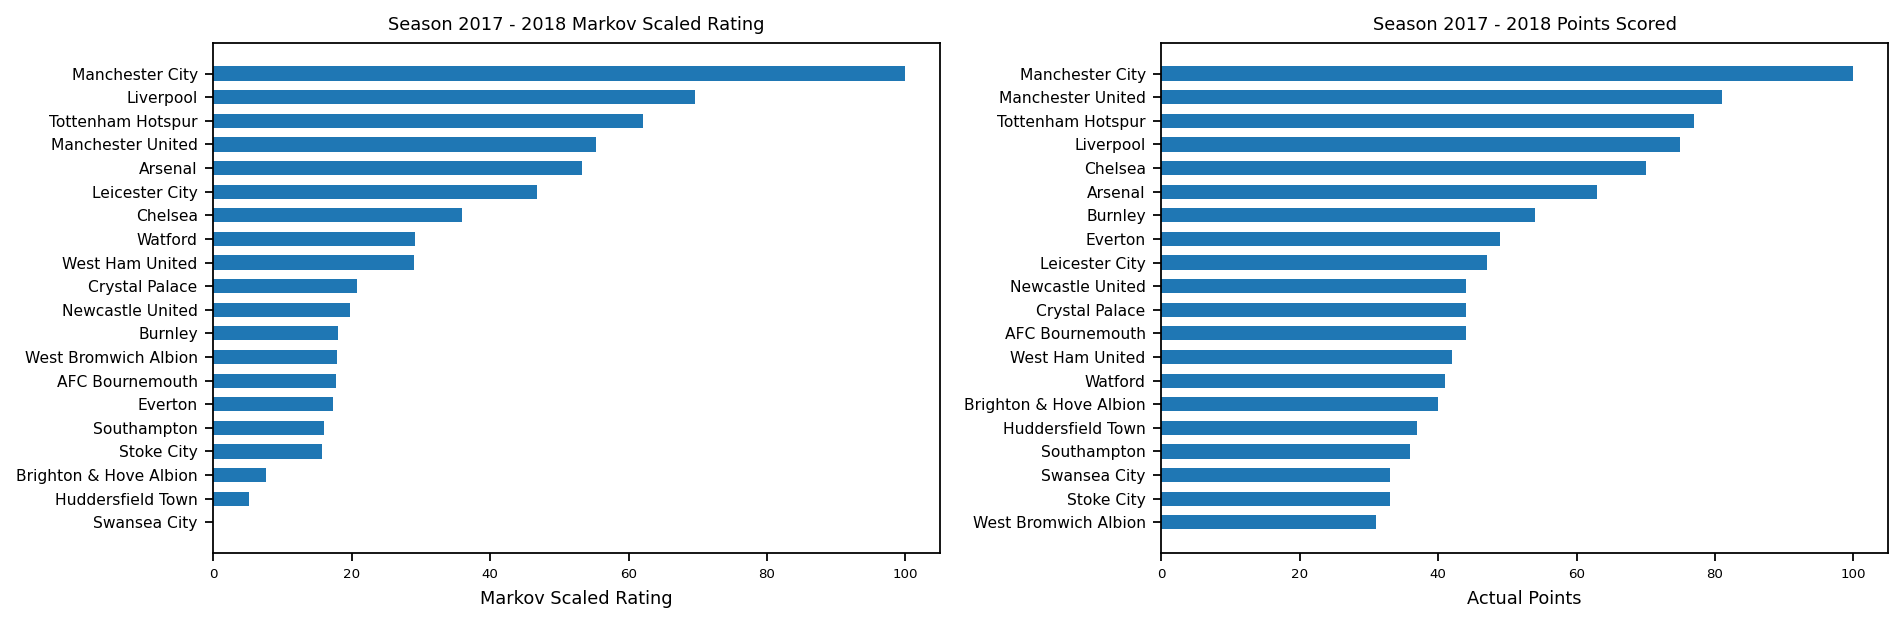

In [ ]:
# Initialize grid of plots
figure, axis = plt.subplots(nrows=1, ncols=2, figsize=(12, 4), dpi=160)

# Plot Keener scaled rating - plot 0, row 0
axis[0].barh(
    match_grid["Markov_Ranking"],
    match_grid["Markov_Scaled_Rating"],
    height=0.6, align='center'
    )

# Configure y axis
axis[0].set_yticks(
    match_grid["Markov_Ranking"],
    labels=match_grid.index,
    fontsize=7
    )
axis[0].invert_yaxis()  # labels read top-to-bottom

# X axis and title
axis[0].tick_params(axis="x", labelsize=6)
axis[0].set_xlabel('Markov Scaled Rating', fontsize=8)
axis[0].set_title(f'Season {current_season} Markov Scaled Rating', fontsize=8)

# Plot actual ranking and point scored - plot 1, row 0
axis[1].barh(
    match_grid["Actual_Ranking"],
    match_grid["Points"],
    height=0.6, align='center'
    )

# Configure y axis
axis[1].set_yticks(
    match_grid["Actual_Ranking"],
    labels=match_grid.index,
    fontsize=7
    )
axis[1].invert_yaxis()  # labels read top-to-bottom

# X axis and title
axis[1].tick_params(axis="x", labelsize=6)
axis[1].set_xlabel('Actual Points', fontsize=8)
axis[1].set_title(f'Season {current_season} Points Scored', fontsize=8)

# Use 'tight_layout' to avoid overlapping text
plt.tight_layout()
plt.show()

# Get rankings from all methods in a new table

In [ ]:
rankings = [
    "Teams",
    "Actual_Ranking",
    "Massey_Ranking",
    "Keener_Ranking",
    "Markov_Ranking"
    ]
ranks_df = compiled_results.loc[:, rankings].copy().set_index("Teams")
ranks_df

,Actual_Ranking,Massey_Ranking,Keener_Ranking,Markov_Ranking
Teams,,,,
Manchester City,1,1,1,1
Manchester United,2,3,2,4
Tottenham Hotspur,3,4,3,3
Liverpool,4,2,4,2
Chelsea,5,5,6,7
Arsenal,6,6,5,5
Burnley,7,7,8,12
Everton,8,11,9,15
Leicester City,9,8,7,6


In [ ]:
ranks_df.corr()

,Actual_Ranking,Massey_Ranking,Keener_Ranking,Markov_Ranking
Actual_Ranking,1.000000,0.956391,0.968421,0.827068
Massey_Ranking,0.956391,1.000000,0.954887,0.869173
Keener_Ranking,0.968421,0.954887,1.000000,0.867669
Markov_Ranking,0.827068,0.869173,0.867669,1.000000


## Import the table of the subsequent season to check

In [ ]:
# Read the league table data - skip the first row
next_league_table = pd.read_csv(coming_league_table_file, skiprows=1)
next_league_table["Actual_Ranking"] = np.arange(1, 21)

# Uncomment if you want to see the raw table
# league_table

## Keep some of the columns and rename them

In [ ]:
required_cols = ["Unnamed: 1", "P.2", "W.2", "D.2", "L.2", "F", "A", "+/-", "Pts", "Actual_Ranking"]
renaming = {
    "Unnamed: 1": "Teams",
    "P.2": "Total_Matches_Played",
    "W.2": "Total_Wins",
    "D.2": "Total_Draws",
    "L.2": "Total_Losses",
    "F": "Goals_Scored",
    "A": "Goals_Conceded",
    "+/-": "Goal_Difference",
    "Pts": "Points"
    }

# Make a copy of the league table, keeping only the necessary columns renamed
next_league_table = (
    next_league_table
    .loc[:, required_cols]
    .copy()
    .rename(columns=renaming)
)

next_league_table

,Teams,Total_Matches_Played,Total_Wins,Total_Draws,Total_Losses,Goals_Scored,Goals_Conceded,Goal_Difference,Points,Actual_Ranking
0,Manchester City,38,32,2,4,95,23,72,98,1
1,Liverpool,38,30,7,1,89,22,67,97,2
2,Chelsea,38,21,9,8,63,39,24,72,3
3,Tottenham Hotspur,38,23,2,13,67,39,28,71,4
4,Arsenal,38,21,7,10,73,51,22,70,5
5,Manchester United,38,19,9,10,65,54,11,66,6
6,Wolverhampton Wanderers,38,16,9,13,47,46,1,57,7
7,Everton,38,15,9,14,54,46,8,54,8
8,Leicester City,38,15,7,16,51,48,3,52,9
9,West Ham United,38,15,7,16,52,55,-3,52,10


## Recall estimated rankings from Massey, Colley and Keener

In [ ]:
ranks_df

,Actual_Ranking,Massey_Ranking,Keener_Ranking,Markov_Ranking
Teams,,,,
Manchester City,1,1,1,1
Manchester United,2,3,2,4
Tottenham Hotspur,3,4,3,3
Liverpool,4,2,4,2
Chelsea,5,5,6,7
Arsenal,6,6,5,5
Burnley,7,7,8,12
Everton,8,11,9,15
Leicester City,9,8,7,6
